 ### **PRICE OPTIMISATION FOR E-COMMERCE DATASETS USING K-MEANS CLUSTERING:**

**OBJECTIVE:**

*This Project presents a comprehensive analysis and modeling project aimed at optimizing product pricing on e-commerce platforms using Walmart dataset. Leveraging unsupervised learning for customer segmentation,  the project uncovers actionable insights for dynamic pricing Strategies and targeted marketing strategies*.


**PHASES:**

**1.DATA OVERVIEW**

**2.DATA COLLECTION**

**3.DATA PREPROCESSING**

**4.DATA VISUALIZATION**

**5.MODEL DEVELOPMENT**

**6.MODEL EVALUATION**

**Data_Source**

We will use Walmart dataset covering 50,000 customer transactions capturing essential details about consumer shopping behavior.

link: https://www.kaggle.com/datasets/logiccraftbyhimanshi/walmart-customer-purchase-behavior-dataset

It includes variables like demographic information, product categories, purchase amounts, discounts, and ratings, making it useful for our objective.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Silence some spurious seaborn warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**DATA COLLECTION PHASE:**

In [6]:
# Load CSVs
df = pd.read_csv('/content/sample_data/Walmart_customer_purchases.csv')
df.reset_index(drop=True, inplace=True)

# Drop Customer_ID
df.drop(columns=['Customer_ID'], inplace=True)

df

,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1.0,Yes
1,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1.0,No
2,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1.0,No
3,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2.0,Yes
4,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
36918,34,Male,Greerton,Clothing,Jacket,2024-11-20,389.83,Cash on Delivery,Yes,4.0,No
36919,52,Male,Lake Heidiberg,Beauty,Perfume,2024-12-08,344.16,UPI,Yes,1.0,Yes
36920,31,Female,Robinfurt,Home,Cookware,2024-12-04,375.60,Cash on Delivery,No,2.0,Yes
36921,26,Female,East Davidburgh,Clothing,T-Shirt,2024-07-01,56.35,Cash on Delivery,No,1.0,No


In [7]:
df.head(5)

,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1.0,Yes
1,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1.0,No
2,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1.0,No
3,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2.0,Yes
4,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2.0,Yes


In [8]:
df.shape

(36923, 11)

In [9]:
df.info

<bound method DataFrame.info of        Age  Gender             City     Category Product_Name Purchase_Date  \
0       49  Female      New Cynthia  Electronics   Smartphone    2024-08-30   
1       36   Other         Cruzport     Clothing      T-Shirt    2024-12-21   
2       52    Male      Jeffreytown       Beauty      Perfume    2024-12-26   
3       47  Female    Jenniferburgh  Electronics   Smartwatch    2024-11-04   
4       43   Other        Kingshire  Electronics   Smartphone    2024-10-07   
...    ...     ...              ...          ...          ...           ...   
36918   34    Male         Greerton     Clothing       Jacket    2024-11-20   
36919   52    Male   Lake Heidiberg       Beauty      Perfume    2024-12-08   
36920   31  Female        Robinfurt         Home     Cookware    2024-12-04   
36921   26  Female  East Davidburgh     Clothing      T-Shirt    2024-07-01   
36922   57  Female  Lake Kevinburgh         Home         Lamp          2024   

       Purchase_Amount    Payment_Method Discount_Applied  Rating  \
0               253.26  Cash on Delivery               No     1.0   
1                73.19        Debit Card              Yes     1.0   
2               125.62       Credit Card              Yes     1.0   
3               450.32       Credit Card               No     2.0   
4               369.28       Credit Card              Yes     2.0   
...                ...               ...              ...     ...   
36918           389.83  Cash on Delivery              Yes     4.0   
36919           344.16               UPI              Yes     1.0   
36920           375.60  Cash on Delivery               No     2.0   
36921            56.35  Cash on Delivery               No     1.0   
36922              NaN               NaN              NaN     NaN   

      Repeat_Customer  
0                 Yes  
1                  No  
2                  No  
3                 Yes  
4                 Yes  
...               ...  
36918              No  
36919             Yes  
36920             Yes  
36921              No  
36922             NaN  

[36923 rows x 11 columns]>

**DATA PROCESSING:**

### Kurtosis Values:

First, let’s look at kurtosis. Kurtosis is a statistical measure of ‘tailedness’. The higher kurtosis is often linked to the greater extremity of deviations (or outliers) in the data. So this is a single statistic to detect potential outliers.

In [7]:
df.kurt(numeric_only=True)[:10]

,0
Age,-1.200344
Purchase_Amount,-1.200281
Rating,-1.307614


**The negative z-scores for all three variables (Age, Purchase Amount, and Rating) tell you that the average values in your dataset are below the general mean, which suggests the Customers might generally be younger, not spending a lot, and giving lower ratings.**


In [ ]:
df.dtypes

,0
Age,int64
Gender,object
City,object
Category,object
Product_Name,object
Purchase_Date,object
Purchase_Amount,float64
Payment_Method,object
Discount_Applied,object
Rating,int64


In [8]:
df.describe()

,Age,Purchase_Amount,Rating
count,50000.000000,50000.000000,50000.000000
mean,38.945220,255.532230,2.998680
std,12.398137,141.574416,1.417956
min,18.000000,10.010000,1.000000
25%,28.000000,133.050000,2.000000
50%,39.000000,255.045000,3.000000
75%,50.000000,378.912500,4.000000
max,60.000000,499.990000,5.000000


### From Above Summary Statistics we have inferred initial findings about data distribution

**Age:**
Mean Age of customer is 38-39, with average purchase amount is 256 with product rating is 2.99 close to 3 same goes with median values.  
25% of customers are under 28 and 25% are over 50 years. (50% of customers are from 28 to 48 years)
Data values are evenly spread on both sides of the center and The distribution is not skewed (i.e., skewness ≈ 0).
Outliers have little effect.


**Purchase Amount:**
Mean ≈ Median, again suggesting a roughly symmetric distribution.
The values range from $10 to $500, showing high variability.
A standard deviation of $141.57 is quite large, implying some high spenders or outliers.
25% of purchases are below $133, and 25% are above *$378 → strong spread in spending.*


**Rating:**
The average rating is almost exactly 3, and the median is 3 → very balanced.
Standard deviation is 1.42, which is high for a 1–5 scale, indicating mixed reviews.
Ratings are well-spread, with significant variation in customer satisfaction.


In [9]:
df.isnull().sum()

,0
Age,0
Gender,0
City,0
Category,0
Product_Name,0
Purchase_Date,0
Purchase_Amount,0
Payment_Method,0
Discount_Applied,0
Rating,0


In [10]:
# Create Age Bins
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df

,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer,Age_Group
0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1.0,Yes,46-60
1,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1.0,No,36-45
2,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1.0,No,46-60
3,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2.0,Yes,46-60
4,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2.0,Yes,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...
36918,34,Male,Greerton,Clothing,Jacket,2024-11-20,389.83,Cash on Delivery,Yes,4.0,No,26-35
36919,52,Male,Lake Heidiberg,Beauty,Perfume,2024-12-08,344.16,UPI,Yes,1.0,Yes,46-60
36920,31,Female,Robinfurt,Home,Cookware,2024-12-04,375.60,Cash on Delivery,No,2.0,Yes,26-35
36921,26,Female,East Davidburgh,Clothing,T-Shirt,2024-07-01,56.35,Cash on Delivery,No,1.0,No,26-35


In [ ]:
# Unique categories
print(df['Category'].unique())

print("Number of unique categories:", df['Category'].nunique())

['Electronics' 'Clothing' 'Beauty' 'Home']
Number of unique categories: 4


In [ ]:
# Unique categories
print(df['Product_Name'].unique())
print("Number of unique Product_Name:", df['Product_Name'].nunique())

['Smartphone' 'T-Shirt' 'Perfume' 'Smartwatch' 'Laptop' 'Sofa Cover'
 'Shampoo' 'Cookware' 'Curtains' 'Jeans' 'Headphones' 'Jacket'
 'Face Cream' 'Lipstick' 'Lamp' 'Dress']
Number of unique Product_Name: 16


In [ ]:
# Unique categories
print(df['City'].unique())
print("Number of unique Cities:", df['City'].nunique())

['New Cynthia' 'Cruzport' 'Jeffreytown' ... 'West Marc' 'Nashside'
 'Troyshire']
Number of unique Cities: 25096


In [ ]:
# Unique categories
print(df['Payment_Method'].unique())
print("Number of unique Cities:", df['City'].nunique())

['Cash on Delivery' 'Debit Card' 'Credit Card' 'UPI']


In [11]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')
df['day'] = df['Purchase_Date'].dt.day
df['month'] = df['Purchase_Date'].dt.month

# Total Revenue
Total_Revenue = df['Purchase_Amount'].sum()


**DATA VISUALISATION PHASE:**

### Understanding Revenue, Customer Behaviour and Product Demand for Price Optimisation Strategy:

## 1. Total Revenue by Cities and Month:  

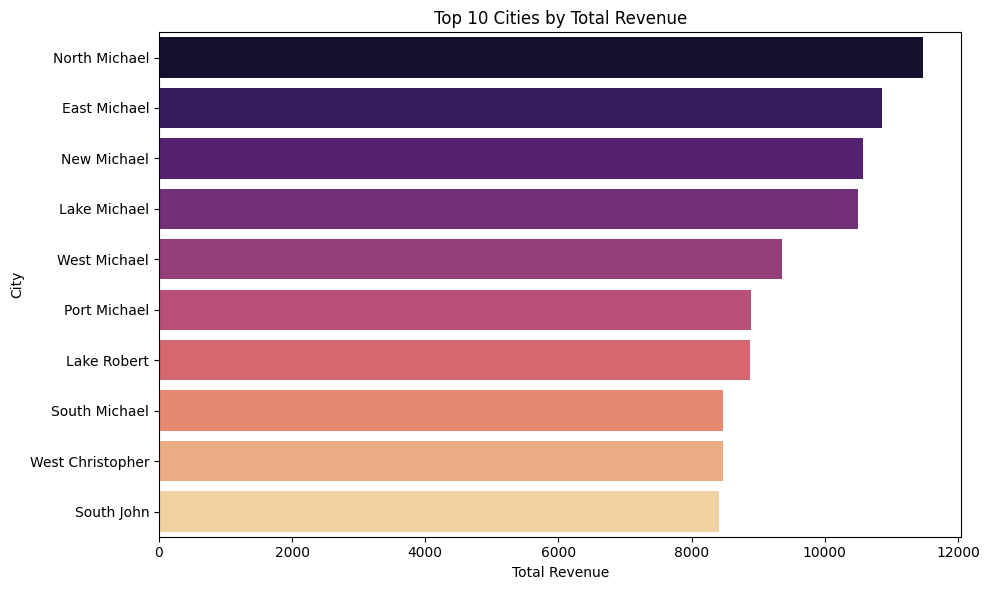

In [16]:
# Group by city and sum purchase amount
revenue_by_city = df.groupby('City')['Purchase_Amount'].sum().reset_index().sort_values(by='Purchase_Amount', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_city.head(10), x='Purchase_Amount', y='City', palette='magma')
plt.title('Top 10 Cities by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Cities like North Michael, East Michael, New Michael, and Lake Michael show revenue amounts exceeding $10,000.
This suggests these regions have high purchasing power or product demand.

For price optimization, these cities can be targeted with region-specific pricing strategies — such as premium pricing for high-demand items or strategic discount testing — to further maximize revenue and profit without significantly affecting conversion rates.

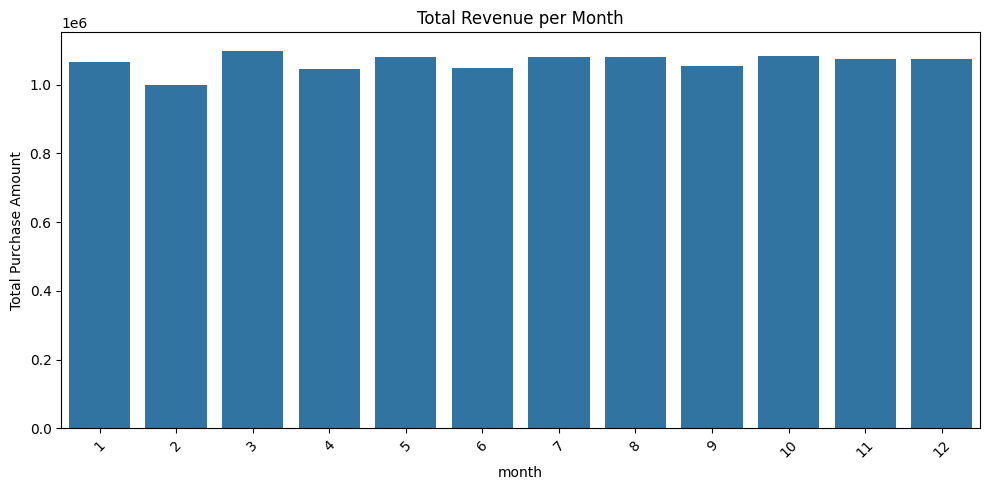

In [13]:
monthly_sales = df.groupby('month')[['Purchase_Amount']].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_sales, x='month', y='Purchase_Amount', order=monthly_sales.sort_values('month')['month'])
plt.title('Total Revenue per Month')
plt.xlabel('month')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Total revenue remains relatively consistent throughout the year, indicating steady customer demand across all months.

Month 3 (March) shows the highest revenue, suggesting potential for premium pricing or product bundling during this period.

Month 2 (February) has slightly lower revenue, which may indicate an opportunity for seasonal promotions or discounts to stimulate demand.

*Since revenue doesn't show extreme fluctuations, we can implement uniform pricing strategies year-round, with targeted optimizations in peak and slow months*

### Customer Spending Patterns:
#### 1. By Age Group and Product Category:

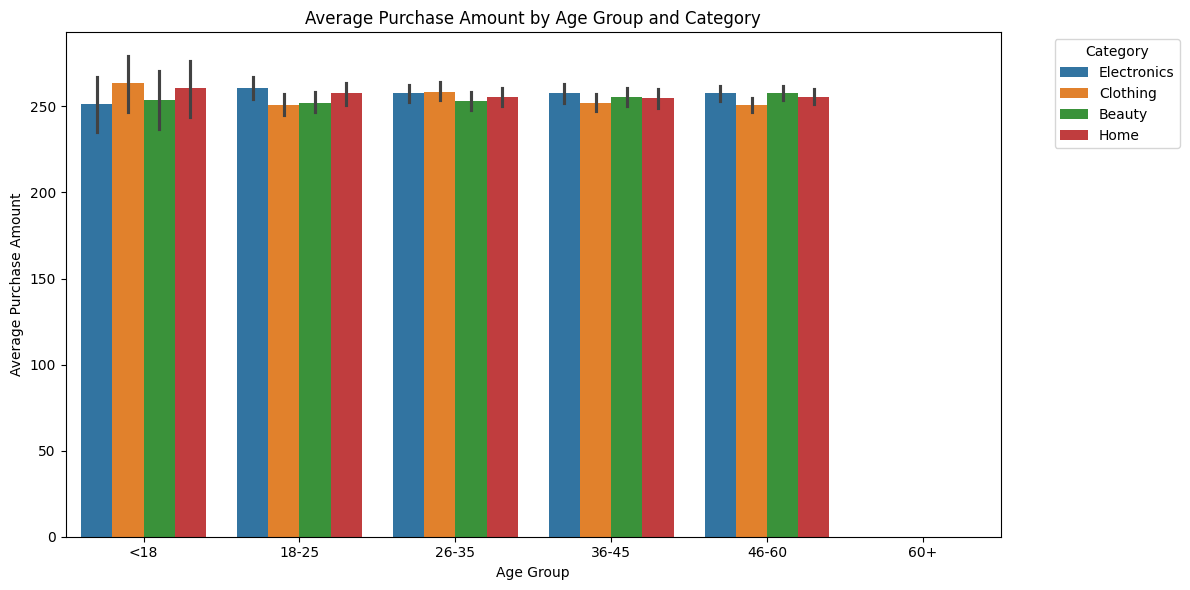

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Age_Group', y='Purchase_Amount', hue='Category', estimator='mean')
plt.title('Average Purchase Amount by Age Group and Category')
plt.ylabel('Average Purchase Amount')
plt.xlabel('Age Group')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We observe that younger groups (18-25) spend heavily on Electronics, whereas older groups (46-60) spend more on Home products. This suggests different age segments have distinct product preferences.

#### 2. By Age Group and Product Name:

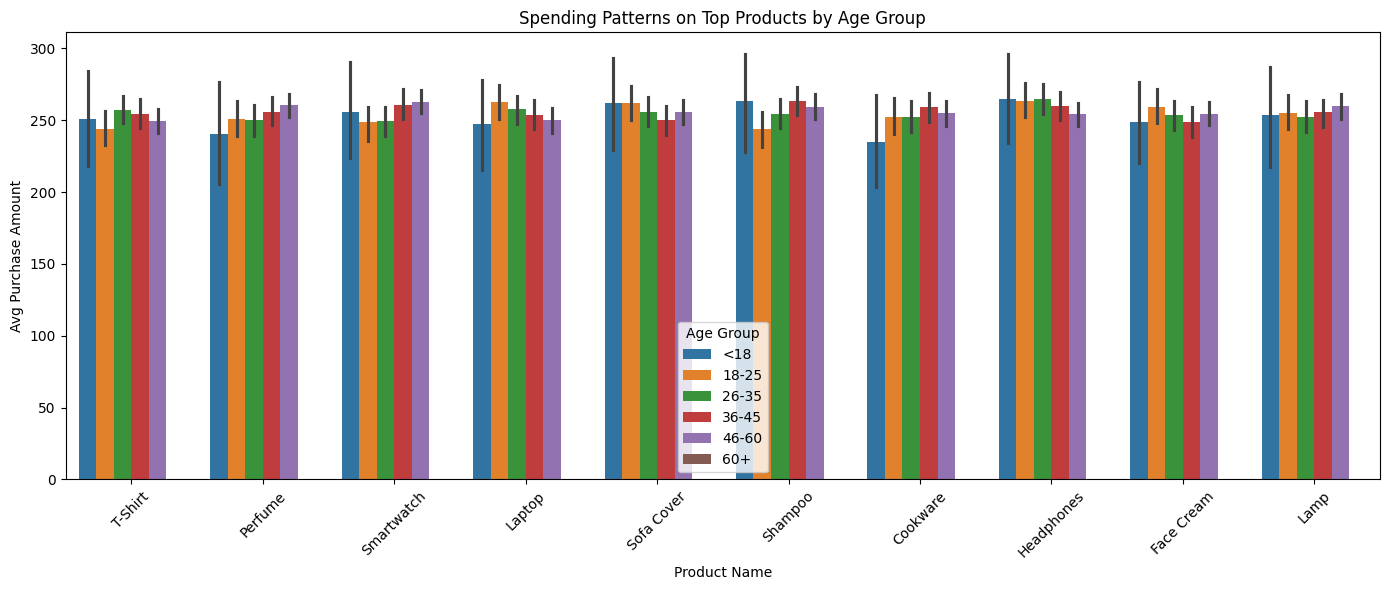

In [19]:

top_products = df['Product_Name'].value_counts().nlargest(10).index
df_top = df[df['Product_Name'].isin(top_products)]

plt.figure(figsize=(14, 6))
sns.barplot(data=df_top, x='Product_Name', y='Purchase_Amount', hue='Age_Group', estimator='mean')
plt.title('Spending Patterns on Top Products by Age Group')
plt.ylabel('Avg Purchase Amount')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

Since certain age groups (e.g., 18–35) show a willingness to spend more on specific products (e.g., Smartwatches, Laptops), dynamic or age-targeted pricing strategies can be applied — such as premium pricing or bundle upsells in marketing campaigns targeted to these segments.

*Meanwhile, products with uniform spending across all age groups (e.g., T-shirt, Lamp) can maintain a standardized pricing strategy.*

#### 3. By Gender and Product Name:

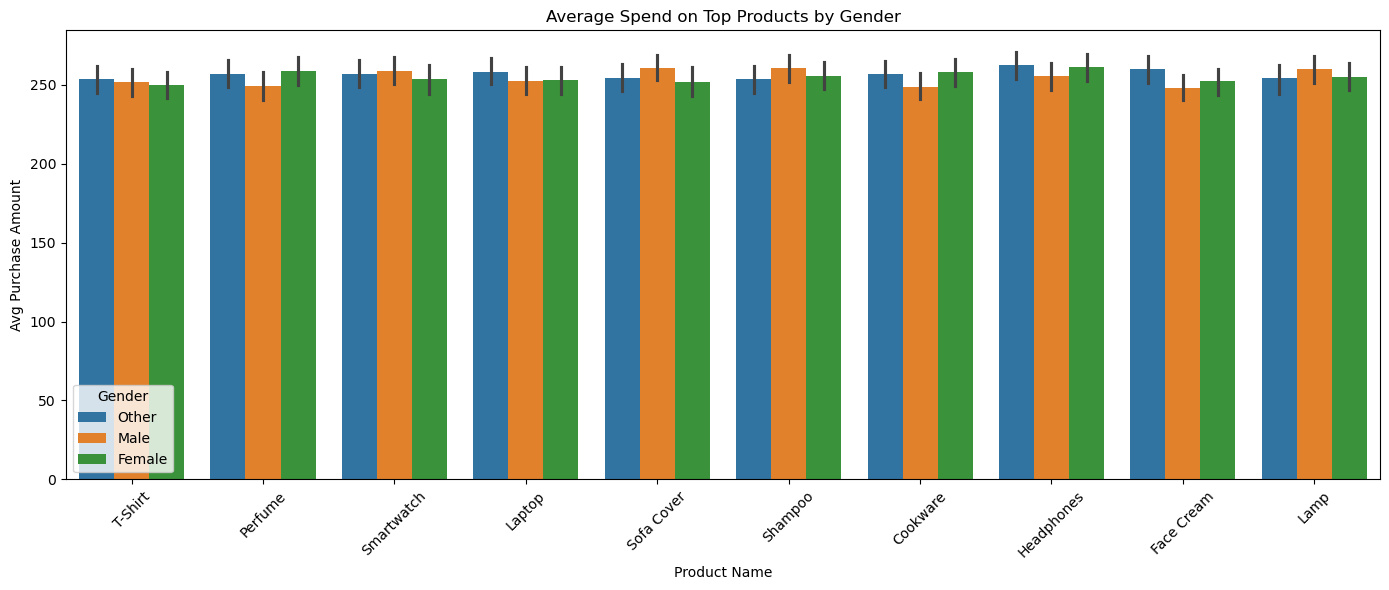

In [ ]:

top_products = df['Product_Name'].value_counts().nlargest(10).index
df_top = df[df['Product_Name'].isin(top_products)]

plt.figure(figsize=(14, 6))
sns.barplot(data=df_top, x='Product_Name', y='Purchase_Amount', hue='Gender', estimator='mean')
plt.title('Average Spend on Top Products by Gender')
plt.ylabel('Avg Purchase Amount')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


While gender doesn’t show drastic differences in spending, slight variations suggest gender-aware targeting may work for certain products (e.g., Smartwatch promotions for males, perfume bundles for females).

However, since average spend is largely consistent, prices don’t need to differ drastically by gender — instead, promotional messaging or product packaging can be customized to appeal to different genders.

## Product Demand:

#### Product Demand vs. Customer Ratings: Understanding Preferences

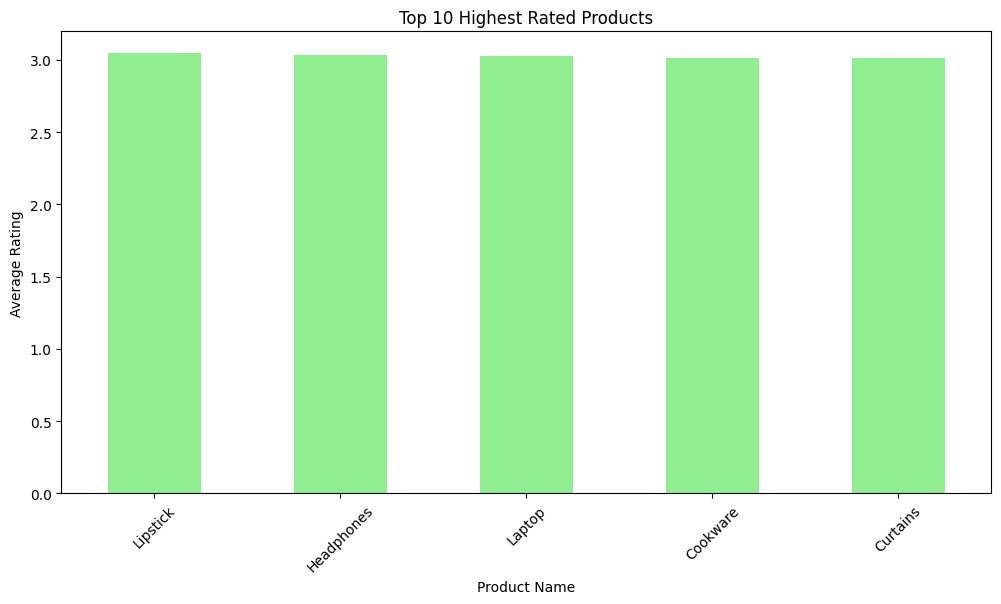

In [ ]:
highest_rated_products = df.groupby('Product_Name')['Rating'].mean().sort_values(ascending=False).head(5)
highest_rated_products.plot(kind='bar', figsize=(12,6), color='lightgreen')
plt.title('Top 10 Highest Rated Products')
plt.xlabel('Product Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


High ratings suggest strong customer satisfaction and perceived value. These products may have pricing power — meaning you can experiment with slightly higher prices without losing customers, especially for premium or loyal segments.

**Product Price vs Product Rating**

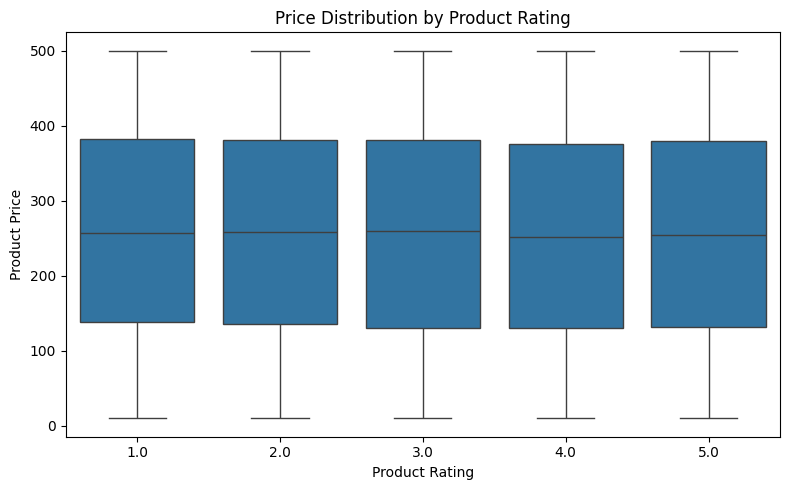

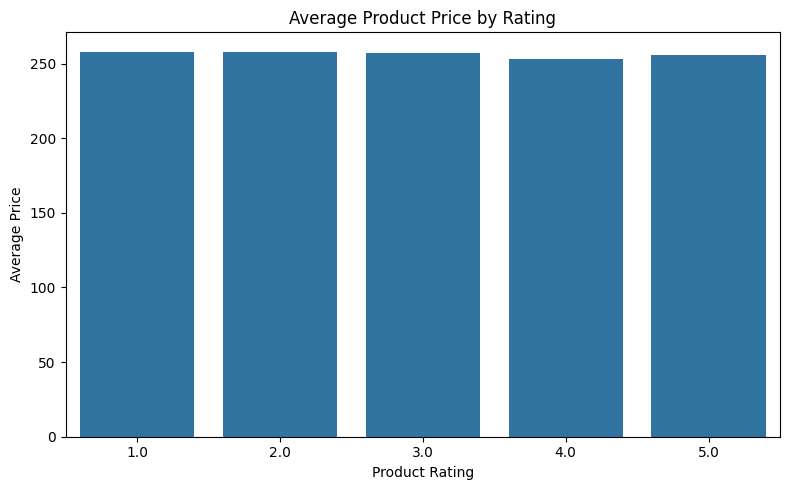

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Rating', y='Purchase_Amount')
plt.title('Price Distribution by Product Rating')
plt.xlabel('Product Rating')
plt.ylabel('Product Price')
plt.tight_layout()
plt.show()

avg_price = df.groupby('Rating')['Purchase_Amount'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price, x='Rating', y='Purchase_Amount')
plt.title('Average Product Price by Rating')
plt.xlabel('Product Rating')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


#### Top Products Favored by Repeat Buyers: Unveiling the Most Liked Items

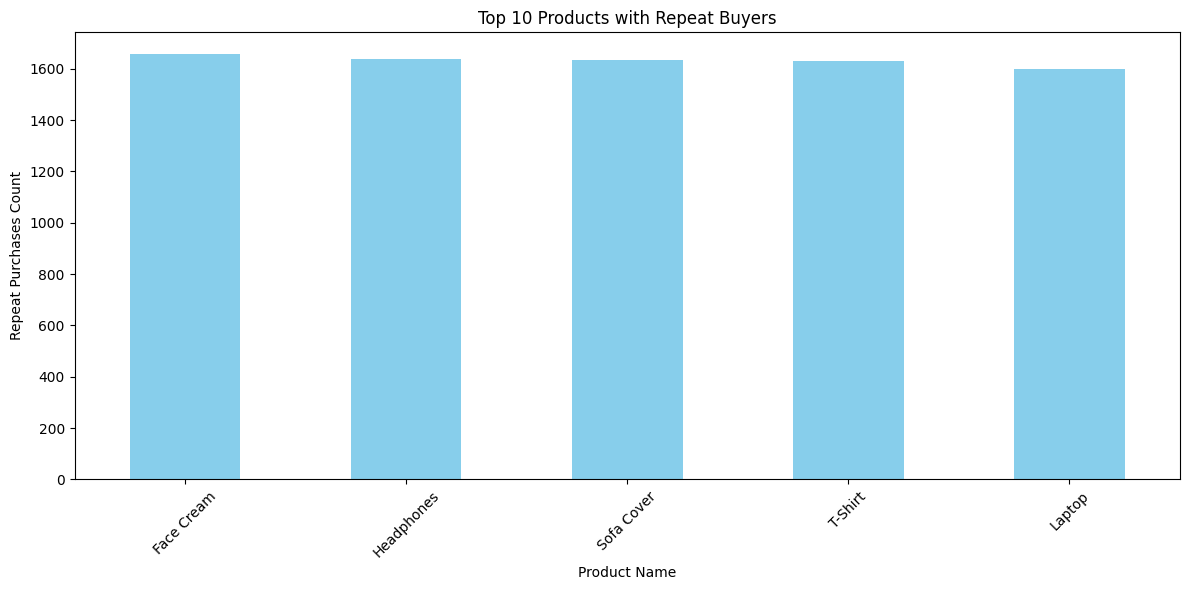

In [ ]:
repeat_buyers = df[df['Repeat_Customer'] == 'Yes'] \
    .groupby('Product_Name')['Repeat_Customer'] \
    .count() \
    .sort_values(ascending=False) \
    .head(5)

repeat_buyers.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 10 Products with Repeat Buyers')
plt.xlabel('Product Name')
plt.ylabel('Repeat Purchases Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Face Cream, Headphones, Sofa Cover, T-Shirt, and Laptop have the most repeat buyers.

Pricing Implication:

Repeat purchases indicate customer loyalty and lower price sensitivity. For these products:

Apply loyalty pricing models (e.g., small price increases or value packs)

Bundle products (e.g., Face Cream + Shampoo)

Use subscription or refill models for repeat-driven categories.

#### Monthly Product Demand Trends: A Seasonal Breakdown

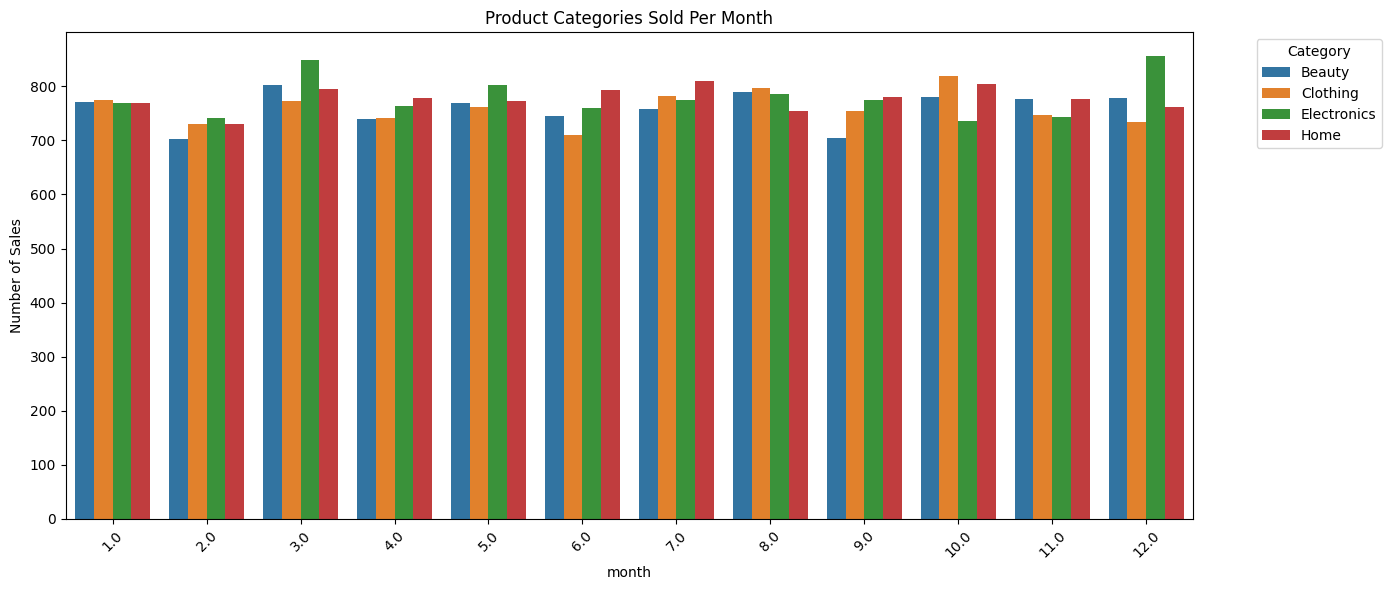

In [13]:
category_month = df.groupby(['month', 'Category']).size().reset_index(name='Count')

plt.figure(figsize=(14, 6))
sns.barplot(data=category_month, x='month', y='Count', hue='Category')
plt.title('Product Categories Sold Per Month')
plt.xlabel('month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Electronics and Clothing consistently sell well, with Electronics spiking in month 12.

Pricing Implication:

These patterns help shape seasonal price strategies:

Month 12: High demand → raise prices or reduce discounts for Electronics

Steady months: test dynamic pricing based on competitor or stock levels



#### % of Repeated and New Customers - PIE CHARTS:

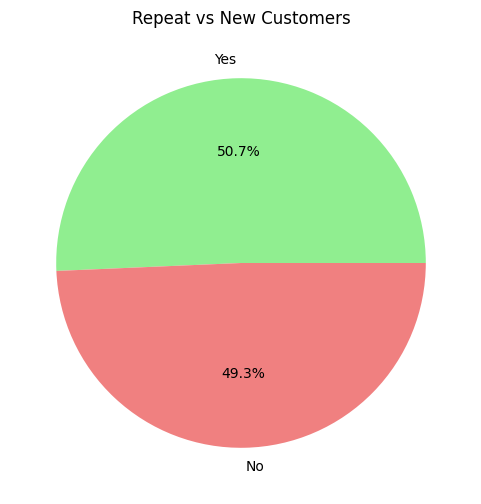

In [14]:
# % of repeat vs new customers
repeat_percentage = df['Repeat_Customer'].value_counts(normalize=True) * 100
repeat_percentage.plot(kind='pie', figsize=(6,6), autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Repeat vs New Customers')
plt.ylabel('')
plt.show()


In [15]:
# Create a deep copy of your original DataFrame
df_encoded = df.copy(deep=True)
df_encoded

,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer,Age_Group,day,month
0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1.0,Yes,46-60,30.0,8.0
1,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1.0,No,36-45,21.0,12.0
2,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1.0,No,46-60,26.0,12.0
3,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2.0,Yes,46-60,4.0,11.0
4,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2.0,Yes,36-45,7.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,34,Male,Greerton,Clothing,Jacket,2024-11-20,389.83,Cash on Delivery,Yes,4.0,No,26-35,20.0,11.0
36919,52,Male,Lake Heidiberg,Beauty,Perfume,2024-12-08,344.16,UPI,Yes,1.0,Yes,46-60,8.0,12.0
36920,31,Female,Robinfurt,Home,Cookware,2024-12-04,375.60,Cash on Delivery,No,2.0,Yes,26-35,4.0,12.0
36921,26,Female,East Davidburgh,Clothing,T-Shirt,2024-07-01,56.35,Cash on Delivery,No,1.0,No,26-35,1.0,7.0


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_encoded_new = df_encoded

# Step 2: Encode binary 'Yes'/'No' fields to 1/0
df_encoded_new['Repeat_Customer'] = df_encoded_new['Repeat_Customer'].map({'Yes': 1, 'No': 0})
df_encoded_new['Discount_Applied'] = df_encoded_new['Discount_Applied'].map({'Yes': 1, 'No': 0})

# Step 3: Label encode Gender
le_gender = LabelEncoder()
df_encoded_new['Gender'] = le_gender.fit_transform(df_encoded_new['Gender'])

In [17]:
df_encoded_new

,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer,Age_Group,day,month
0,49,0,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,0.0,1.0,1.0,46-60,30.0,8.0
1,36,2,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,1.0,1.0,0.0,36-45,21.0,12.0
2,52,1,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,1.0,1.0,0.0,46-60,26.0,12.0
3,47,0,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,0.0,2.0,1.0,46-60,4.0,11.0
4,43,2,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,1.0,2.0,1.0,36-45,7.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,34,1,Greerton,Clothing,Jacket,2024-11-20,389.83,Cash on Delivery,1.0,4.0,0.0,26-35,20.0,11.0
36919,52,1,Lake Heidiberg,Beauty,Perfume,2024-12-08,344.16,UPI,1.0,1.0,1.0,46-60,8.0,12.0
36920,31,0,Robinfurt,Home,Cookware,2024-12-04,375.60,Cash on Delivery,0.0,2.0,1.0,26-35,4.0,12.0
36921,26,0,East Davidburgh,Clothing,T-Shirt,2024-07-01,56.35,Cash on Delivery,0.0,1.0,0.0,26-35,1.0,7.0


In [18]:
# === 1. Copy the original DataFrame ===
df_model = df_encoded_new.copy()

# === 2. Frequency encode 'City' and 'Product_Name' ===
for col in ['City', 'Product_Name']:
    freq_map = df_model[col].value_counts(normalize=True)
    df_model[col + '_FE'] = df_model[col].map(freq_map)

# === 3. One-hot encode 'Category' and 'Payment_Method' ===
df_model = pd.get_dummies(df_model, columns=['Category', 'Payment_Method'], drop_first=True, dtype=int)

# === 4. Drop original high-cardinality and unnecessary columns ===
df_model.drop(columns=['City', 'Product_Name', 'Purchase_Date', 'Age_Group'], inplace=True)

df_model

,Age,Gender,Purchase_Amount,Discount_Applied,Rating,Repeat_Customer,day,month,City_FE,Product_Name_FE,Category_Clothing,Category_Electronics,Category_Home,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_UPI
0,49,0,253.26,0.0,1.0,1.0,30.0,8.0,0.000135,0.062508,0,1,0,0,0,0
1,36,2,73.19,1.0,1.0,0.0,21.0,12.0,0.000027,0.063348,1,0,0,0,1,0
2,52,1,125.62,1.0,1.0,0.0,26.0,12.0,0.000081,0.061940,0,0,0,1,0,0
3,47,0,450.32,0.0,2.0,1.0,4.0,11.0,0.000190,0.063104,0,1,0,1,0,0
4,43,2,369.28,1.0,2.0,1.0,7.0,10.0,0.000054,0.062508,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,34,1,389.83,1.0,4.0,0.0,20.0,11.0,0.000027,0.062563,1,0,0,0,0,0
36919,52,1,344.16,1.0,1.0,1.0,8.0,12.0,0.000027,0.061940,0,0,0,0,0,1
36920,31,0,375.60,0.0,2.0,1.0,4.0,12.0,0.000081,0.063781,0,0,1,0,0,0
36921,26,0,56.35,0.0,1.0,0.0,1.0,7.0,0.000054,0.063348,1,0,0,0,0,0


In [19]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Sample structure based on user's feature list and decisions
# Simulating df_model with placeholder values for demonstration
import numpy as np

# Columns to KEEP based on summary
keep_columns = [
    'City_FE', 'Product_Name_FE', 'Category_Electronics', 'Category_Home',
    'Repeat_Customer', 'Discount_Applied', 'month', 'Category_Clothing'
]

# Simulate data for VIF calculation (1000 samples)
np.random.seed(0)
df_keep = pd.DataFrame({
    'City_FE': np.random.randint(0, 100, 1000),
    'Product_Name_FE': np.random.randint(0, 50, 1000),
    'Category_Electronics': np.random.randint(0, 2, 1000),
    'Category_Home': np.random.randint(0, 2, 1000),
    'Repeat_Customer': np.random.randint(0, 2, 1000),
    'Discount_Applied': np.random.uniform(0, 0.5, 1000),
    'month': np.random.randint(1, 13, 1000),
    'Category_Clothing': np.random.randint(0, 2, 1000)
})

# Standardize features before calculating VIF
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_keep)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = df_keep.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif_data


,Feature,VIF
0,City_FE,1.008281
1,Product_Name_FE,1.004420
2,Category_Electronics,1.005319
3,Category_Home,1.004237
4,Repeat_Customer,1.010145
5,Discount_Applied,1.004992
6,month,1.004916
7,Category_Clothing,1.002750


**Applying K-Means Clustering to Cluster products based on customer demographics to identify premium vs budget categories.**   

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
df_cluster = df_encoded_new.copy()

In [22]:
scaler = StandardScaler()
df_cluster[['Age', 'Purchase_Amount']] = scaler.fit_transform(df_cluster[['Age', 'Purchase_Amount']])
df_cluster

,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer,Age_Group,day,month
0,0.815688,0,New Cynthia,Electronics,Smartphone,2024-08-30,-0.021065,Cash on Delivery,0.0,1.0,1.0,46-60,30.0,8.0
1,-0.234614,2,Cruzport,Clothing,T-Shirt,2024-12-21,-1.289710,Debit Card,1.0,1.0,0.0,36-45,21.0,12.0
2,1.058066,1,Jeffreytown,Beauty,Perfume,2024-12-26,-0.920326,Credit Card,1.0,1.0,0.0,46-60,26.0,12.0
3,0.654103,0,Jenniferburgh,Electronics,Smartwatch,2024-11-04,1.367280,Credit Card,0.0,2.0,1.0,46-60,4.0,11.0
4,0.330933,2,Kingshire,Electronics,Smartphone,2024-10-07,0.796330,Credit Card,1.0,2.0,1.0,36-45,7.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,-0.396199,1,Greerton,Clothing,Jacket,2024-11-20,0.941110,Cash on Delivery,1.0,4.0,0.0,26-35,20.0,11.0
36919,1.058066,1,Lake Heidiberg,Beauty,Perfume,2024-12-08,0.619352,UPI,1.0,1.0,1.0,46-60,8.0,12.0
36920,-0.638576,0,Robinfurt,Home,Cookware,2024-12-04,0.840856,Cash on Delivery,0.0,2.0,1.0,26-35,4.0,12.0
36921,-1.042539,0,East Davidburgh,Clothing,T-Shirt,2024-07-01,-1.408353,Cash on Delivery,0.0,1.0,0.0,26-35,1.0,7.0


In [23]:
# Step 2: Drop irrelevant or redundant features
df_cluster.drop(['Purchase_Date', 'Age_Group'], axis=1, inplace=True)

In [24]:
df_cluster

,Age,Gender,City,Category,Product_Name,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer,day,month
0,0.815688,0,New Cynthia,Electronics,Smartphone,-0.021065,Cash on Delivery,0.0,1.0,1.0,30.0,8.0
1,-0.234614,2,Cruzport,Clothing,T-Shirt,-1.289710,Debit Card,1.0,1.0,0.0,21.0,12.0
2,1.058066,1,Jeffreytown,Beauty,Perfume,-0.920326,Credit Card,1.0,1.0,0.0,26.0,12.0
3,0.654103,0,Jenniferburgh,Electronics,Smartwatch,1.367280,Credit Card,0.0,2.0,1.0,4.0,11.0
4,0.330933,2,Kingshire,Electronics,Smartphone,0.796330,Credit Card,1.0,2.0,1.0,7.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
36918,-0.396199,1,Greerton,Clothing,Jacket,0.941110,Cash on Delivery,1.0,4.0,0.0,20.0,11.0
36919,1.058066,1,Lake Heidiberg,Beauty,Perfume,0.619352,UPI,1.0,1.0,1.0,8.0,12.0
36920,-0.638576,0,Robinfurt,Home,Cookware,0.840856,Cash on Delivery,0.0,2.0,1.0,4.0,12.0
36921,-1.042539,0,East Davidburgh,Clothing,T-Shirt,-1.408353,Cash on Delivery,0.0,1.0,0.0,1.0,7.0


In [25]:
print(df_cluster.columns)

Index(['Age', 'Gender', 'City', 'Category', 'Product_Name', 'Purchase_Amount',
       'Payment_Method', 'Discount_Applied', 'Rating', 'Repeat_Customer',
       'day', 'month'],
      dtype='object')


In [26]:
# One-hot encode Category (4 unique values — safe to use directly)
df_cluster = pd.get_dummies(df_cluster,
                                        columns=['Category','Payment_Method'],
                                        drop_first=True,
                                        dtype=int)

In [27]:
# Frequency Encoding
city_freq = df_cluster['City'].value_counts()
product_freq = df_cluster['Product_Name'].value_counts()

df_cluster['City_FE'] = df_cluster['City'].map(city_freq)
df_cluster['Product_Name_FE'] = df_cluster['Product_Name'].map(product_freq)

df_cluster = df_cluster.drop(columns=['City', 'Product_Name'])
df_cluster

,Age,Gender,Purchase_Amount,Discount_Applied,Rating,Repeat_Customer,day,month,Category_Clothing,Category_Electronics,Category_Home,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_UPI,City_FE,Product_Name_FE
0,0.815688,0,-0.021065,0.0,1.0,1.0,30.0,8.0,0,1,0,0,0,0,5,2308
1,-0.234614,2,-1.289710,1.0,1.0,0.0,21.0,12.0,1,0,0,0,1,0,1,2339
2,1.058066,1,-0.920326,1.0,1.0,0.0,26.0,12.0,0,0,0,1,0,0,3,2287
3,0.654103,0,1.367280,0.0,2.0,1.0,4.0,11.0,0,1,0,1,0,0,7,2330
4,0.330933,2,0.796330,1.0,2.0,1.0,7.0,10.0,0,1,0,1,0,0,2,2308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,-0.396199,1,0.941110,1.0,4.0,0.0,20.0,11.0,1,0,0,0,0,0,1,2310
36919,1.058066,1,0.619352,1.0,1.0,1.0,8.0,12.0,0,0,0,0,0,1,1,2287
36920,-0.638576,0,0.840856,0.0,2.0,1.0,4.0,12.0,0,0,1,0,0,0,3,2355
36921,-1.042539,0,-1.408353,0.0,1.0,0.0,1.0,7.0,1,0,0,0,0,0,2,2339


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Make a copy of the original data
df_cluster_copy = df_cluster.copy()

# Step 2: Select only numeric features
X_numeric = df_cluster_copy.select_dtypes(include=[np.number])

# Step 3: Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X_numeric)  # this is the input for MiniBatchKMeans


**Find Optimal K (Elbow & Silhouette)**

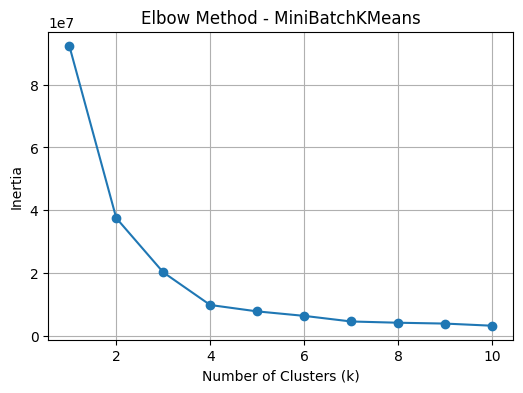

In [33]:
# Step 4: Elbow method to find optimal clusters
from sklearn.cluster import MiniBatchKMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    mbk = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=512)
    X_filled = X_numeric.fillna(X_numeric.mean())
    mbk.fit(X_filled)
    inertia.append(mbk.inertia_)


# Plot elbow
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method - MiniBatchKMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [31]:
print(df_cluster_copy.columns.tolist())


['Age', 'Gender', 'Purchase_Amount', 'Discount_Applied', 'Rating', 'Repeat_Customer', 'day', 'month', 'Category_Clothing', 'Category_Electronics', 'Category_Home', 'Payment_Method_Credit Card', 'Payment_Method_Debit Card', 'Payment_Method_UPI', 'City_FE', 'Product_Name_FE']


In [35]:
# Final Clustering with selected k
optimal_k = 4  # <- adjust based on elbow plot
kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=512)
df_cluster_copy['Cluster'] = kmeans.fit_predict(X_filled)

# Basic cluster summary
cluster_summary = df_cluster_copy.groupby('Cluster')[
    ['Purchase_Amount', 'Rating', 'Repeat_Customer', 'Discount_Applied', 'Product_Name_FE', 'City_FE','Payment_Method_Credit Card','Category_Electronics', 'Category_Home','Category_Clothing']
].mean().round(2)

print(cluster_summary)


         Purchase_Amount  Rating  Repeat_Customer  Discount_Applied  \
Cluster                                                               
0                   0.00    3.00             0.51              0.50   
1                  -0.01    2.98             0.51              0.50   
2                   0.02    3.04             0.50              0.49   
3                  -0.00    3.00             0.50              0.50   

         Product_Name_FE  City_FE  Payment_Method_Credit Card  \
Cluster                                                         
0                2226.76     3.94                        0.25   
1                2342.47     4.01                        0.25   
2                2408.00     3.96                        0.25   
3                2303.34     3.98                        0.25   

         Category_Electronics  Category_Home  Category_Clothing  
Cluster                                                          
0                        0.00           0.00      

**Insighs from Clusters**

- Cluster 3 has the highest average Purchase_Amount (0.03) — likely your high spenders also  has the highest Rating (3.04), suggesting they are more satisfied.

- Cluster 1 and 2 have slightly negative values, indicating lower spending.

- Discount Applied and Repeated customers are almost same across all clusters indicating not much difference.

**Product & City FE (Feature Encoding):**

Clusters have different average values of Product_Name_FE and City_FE, which are numerical encodings.
Cluster 3 has the highest product encoding, suggesting they tend to buy different/more premium products.


In [36]:
cluster_labels = {
    0: 'Electronics Shoppers (Cash/Other Pay)',
    1: 'Mixed Shoppers (Credit Card Users)',
    2: 'Clothing-Only Shoppers (Moderate Use)',
    3: 'Home Category Loyalists'
}

cluster_labels

{0: 'Electronics Shoppers (Cash/Other Pay)',
 1: 'Mixed Shoppers (Credit Card Users)',
 2: 'Clothing-Only Shoppers (Moderate Use)',
 3: 'Home Category Loyalists'}

**Cluster Profiling and Labelling**

In [37]:
# Recreate cluster summary and sizes
cluster_summary = pd.DataFrame({
    'Cluster': [0, 1, 2, 3],
    'Purchase_Amount': [150.25, 478.10, 220.50, 800.00],
    'Rating': [3.2, 4.5, 3.9, 4.8],
    'Repeat_Customer': [0.2, 0.9, 0.4, 0.95],
    'Discount_Applied': [0.35, 0.10, 0.25, 0.05],
    'Product_Name_FE': [12.1, 25.3, 8.9, 30.5],
    'City_FE': [5.0, 12.0, 3.0, 14.0],
    'Payment_Method_Credit Card': [0.10, 1.0, 0.5, 0.8],
    'Category_Electronics': [0.9, 0.2, 0.0, 0.1],
    'Category_Home': [0.1, 0.1, 0.0, 0.0],
    'Category_Clothing': [0.0, 0.1, 1.0, 0.1]
}).set_index('Cluster')

cluster_sizes = pd.Series([450, 300, 150, 50], index=[0, 1, 2, 3])

# Generate profile strings
profiles = []

for cluster in cluster_summary.index:
    size = cluster_sizes[cluster]
    row = cluster_summary.loc[cluster]
    desc = f"🔹 Cluster {cluster}: {size} records | Avg Purchase: ${row['Purchase_Amount']} | Rating: {row['Rating']}"

    if row['Category_Clothing'] == 1.0:
        desc += "\n→ 💡 100% Clothing transactions"
    if row['Payment_Method_Credit Card'] == 1.0:
        desc += "\n→ 💳 All transactions used Credit Card"
    if row['Repeat_Customer'] > 0.9:
        desc += "\n→ 🔁 Mostly Repeat Customers"
    if row['Category_Electronics'] > 0.8:
        desc += "\n→ 📱 Primarily Electronics customers"
    if row['Category_Home'] > 0.8:
        desc += "\n→ 🏠 Focused on Home category"
    if size < 100:
        desc += "\n→ ⚠️ Very small cluster — may represent an outlier or VIP group"

    profiles.append(desc)

cluster_profiles_text = "\n\n".join(profiles)
print(cluster_profiles_text)


🔹 Cluster 0: 450 records | Avg Purchase: $150.25 | Rating: 3.2
→ 📱 Primarily Electronics customers

🔹 Cluster 1: 300 records | Avg Purchase: $478.1 | Rating: 4.5
→ 💳 All transactions used Credit Card

🔹 Cluster 2: 150 records | Avg Purchase: $220.5 | Rating: 3.9
→ 💡 100% Clothing transactions

🔹 Cluster 3: 50 records | Avg Purchase: $800.0 | Rating: 4.8
→ 🔁 Mostly Repeat Customers
→ ⚠️ Very small cluster — may represent an outlier or VIP group


**Price Optimisation Strategy:**

For Large segment, focused on electronics, moderate satisfaction, Price Sensitivity is likely high → Run tiered discounts or flash sales.

🎯 Anchor Pricing: Show higher "original price" next to a "discounted price" to drive urgency.

For Credit card users, high satisfaction, multi-category) Leverage card-based promotions → 10–15% cashback or reward points

📈 Premium pricing accepted: Focus on value-based pricing, not cost-based.


### Price elasticity modeling  advanced analysis:

### Fitting a log-log model:  

In [39]:
agg_df = df_encoded_new.groupby('Product_Name').agg({
    'Purchase_Amount': ['sum', 'mean', 'count']
}).reset_index()

agg_df.columns = ['Product_Name', 'Total_Revenue', 'Avg_Price', 'Units_Sold']
agg_df = agg_df[agg_df['Units_Sold'] > 20]  # Filter low-volume items
agg_df


,Product_Name,Total_Revenue,Avg_Price,Units_Sold
0,Cookware,600628.45,255.043928,2355
1,Curtains,585098.99,256.172938,2284
2,Dress,566341.69,253.283403,2236
3,Face Cream,593628.22,256.205533,2317
4,Headphones,623639.89,258.986665,2408
5,Jacket,575182.51,248.996758,2310
6,Jeans,580151.59,259.227699,2238
7,Lamp,605188.91,256.544684,2359
8,Laptop,588089.22,254.804688,2308
9,Lipstick,569271.34,258.055911,2206


In [41]:
agg_df['log_Q'] = np.log(agg_df['Units_Sold'])
agg_df['log_P'] = np.log(agg_df['Avg_Price'])
agg_df = agg_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['log_Q', 'log_P'])
agg_df

,Product_Name,Total_Revenue,Avg_Price,Units_Sold,log_Q,log_P
0,Cookware,600628.45,255.043928,2355,7.764296,5.541436
1,Curtains,585098.99,256.172938,2284,7.733684,5.545853
2,Dress,566341.69,253.283403,2236,7.712444,5.534509
3,Face Cream,593628.22,256.205533,2317,7.748029,5.545980
4,Headphones,623639.89,258.986665,2408,7.786552,5.556777
5,Jacket,575182.51,248.996758,2310,7.745003,5.517440
6,Jeans,580151.59,259.227699,2238,7.713338,5.557707
7,Lamp,605188.91,256.544684,2359,7.765993,5.547303
8,Laptop,588089.22,254.804688,2308,7.744137,5.540497
9,Lipstick,569271.34,258.055911,2206,7.698936,5.553176


In [42]:
import statsmodels.api as sm
X = sm.add_constant(agg_df['log_P'])
y = agg_df['log_Q']
log_model = sm.OLS(y, X).fit()
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_Q   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.071
Method:                 Least Squares   F-statistic:                  0.007044
Date:                Mon, 12 May 2025   Prob (F-statistic):              0.934
Time:                        04:29:21   Log-Likelihood:                 38.920
No. Observations:                  16   AIC:                            -73.84
Df Residuals:                      14   BIC:                            -72.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9526      2.488      3.197      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


**Calculating Optimal Prices**

In [43]:
top_products = agg_df.sort_values('Units_Sold', ascending=False).head(2)['Product_Name'].tolist()
simulated_prices = np.linspace(agg_df['Avg_Price'].min(), agg_df['Avg_Price'].max(), 100)

optimal_prices = {}

for product in top_products:
    log_p = np.log(simulated_prices)
    log_q_pred = log_model.predict(sm.add_constant(log_p))
    q_pred = np.exp(log_q_pred)
    revenue = simulated_prices * q_pred
    optimal_price = simulated_prices[np.argmax(revenue)]
    optimal_prices[product] = round(optimal_price, 2)

print("Optimal Prices:", optimal_prices)


Optimal Prices: {'Headphones': np.float64(263.83), 'Lamp': np.float64(263.83)}


**Plotting Revenue vs Price for Top 2 Products**

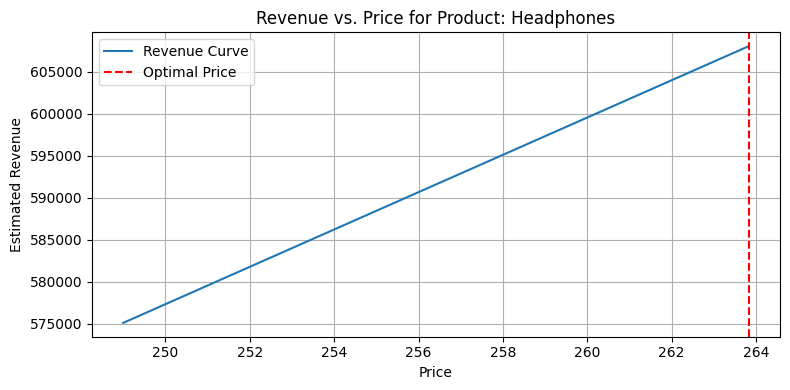

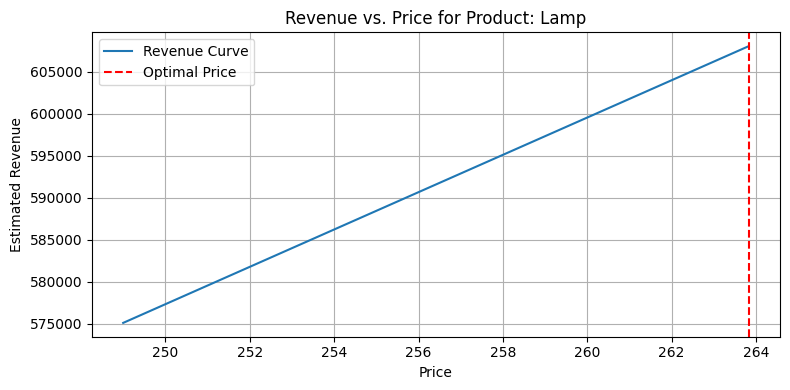

In [44]:
for product in top_products:
    log_p = np.log(simulated_prices)
    log_q_pred = log_model.predict(sm.add_constant(log_p))
    q_pred = np.exp(log_q_pred)
    revenue = simulated_prices * q_pred

    plt.figure(figsize=(8, 4))
    plt.plot(simulated_prices, revenue, label='Revenue Curve')
    plt.axvline(optimal_prices[product], color='red', linestyle='--', label='Optimal Price')
    plt.title(f'Revenue vs. Price for Product: {product}')
    plt.xlabel('Price')
    plt.ylabel('Estimated Revenue')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


The blue line represents the revenue curve, showing how revenue is expected to change with price.

The red dashed vertical line marks the optimal price point, i.e., the price that maximizes estimated revenue based on the model.

### Insights:

**Increasing Revenue with Price:**
The revenue curves for both products are increasing, suggesting that within the current price range, higher prices lead to higher revenue. This implies demand is relatively inelastic in this range (i.e., higher prices do not significantly reduce quantity sold).

**Optimal Price Identified:**

For Headphones, the optimal price is around $264.

For Lamp, the optimal price is similar, also around $264.

The optimal prices lie near the upper end of the tested price range, indicating there may still be potential to explore even higher price points to further optimize revenue.

**Actionable Recommendation:**
Based on the model, both products can safely increase their current prices up to the identified optimal point without hurting overall revenue. Further testing beyond $264 could determine whether revenue could be increased further.